In [59]:
%%HTML
<link rel="stylesheet" type="text/css" href="style.css">

jupyter nbconvert --to slides analisi_hiv_finale.ipynb --no-input --SlidesExporter.reveal_number='c/t' --SlidesExporter.reveal_scroll=True --SlidesExporter.reveal_theme=simple   (ANCORA IN FASE DI LAVORO)

# HIV - Human Immunodeficiency Virus
Danijel Merlo, 173192 <br> <br>
Analisi dei dati relativi all'HIV, principali focalizzazioni su:
- Persone che vivono con l'HIV
- Numero di decessi
- Casi nella fascia di età 15–49 anni

L'obiettivo è evidenziare le tendenze globali, le differenze regionali e nazionali, e i vari legami.

# Dataset utilizzati:
Fonte: Kaggle <br>
Link: https://www.kaggle.com/datasets/imdevskp/hiv-aids-dataset/data <br>
Autore: Devakumar K.P. <br>

1. `no_of_people_living_with_hiv_by_country_clean.csv` (Persone che vivono con HIV)
2. `no_of_deaths_by_country_clean.csv` (Decessi per HIV)
3. `no_of_cases_adults_15_to_49_by_country_clean.csv` (Casi, età 15–49)



## Importazione librerie:

In [12]:

# Librerie importate e nominate:
import pandas as pd #per l'analisi dei dati
import numpy as np #per i calcoli numerici
import seaborn as sns #per creare grafici
import matplotlib.pyplot as plt #per creare grafici anche 2D
import plotly.express as px #per creare grafici interattivi
from matplotlib import cm #per le palette di colori
import warnings #per i messaggi di avviso
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

# Compatibilità notebook
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except Exception:
    pass


## 1) Caricamento e pulizia dei dataset

Carichiamo e puliamo le colonne numeriche. Se i file si trovano nella stessa cartella del notebook, i nomi sono quelli indicati.

In [41]:

def load_and_clean_data(filename):
    """Carica CSV, pulisce Count e le colonne Count_median/min/max."""
    try:
        df = pd.read_csv(filename)
        print(f"Caricato {filename} con {len(df)} righe")
    except FileNotFoundError:
        print(f"File non trovato: {filename}")
        return pd.DataFrame()
    # Normalizziamo nomi column 
    df.columns = [c.strip() for c in df.columns]
    # Puliamo columns Count
    if 'Count' in df.columns:
        df['Count'] = df['Count'].astype(str).str.replace(',', '', regex=False)
        df['Count'] = df['Count'].str.extract(r'([0-9]+\.?[0-9]*)', expand=False)
        df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
    for col in ['Count_median','Count_min','Count_max']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Percorsi file
file_living = 'no_of_people_living_with_hiv_by_country_clean.csv'
file_deaths = 'no_of_deaths_by_country_clean.csv'
file_cases  = 'no_of_cases_adults_15_to_49_by_country_clean.csv'

hiv_living = load_and_clean_data(file_living)
hiv_deaths = load_and_clean_data(file_deaths)
hiv_cases  = load_and_clean_data(file_cases)

# Visualizza anteprime
print('\nAnteprima hiv_living:')
display(hiv_living.head())
print('\nAnteprima hiv_deaths:')
display(hiv_deaths.head())
print('\nAnteprima hiv_cases:')
display(hiv_cases.head())


Caricato no_of_people_living_with_hiv_by_country_clean.csv con 680 righe
Caricato no_of_deaths_by_country_clean.csv con 510 righe
Caricato no_of_cases_adults_15_to_49_by_country_clean.csv con 680 righe

Anteprima hiv_living:


,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,7200.0,7200.0,4100.0,11000.0,Eastern Mediterranean
1,Albania,2018,NaN,NaN,NaN,NaN,Europe
2,Algeria,2018,16000.0,16000.0,15000.0,17000.0,Africa
3,Angola,2018,330000.0,330000.0,290000.0,390000.0,Africa
4,Argentina,2018,140000.0,140000.0,130000.0,150000.0,Americas



Anteprima hiv_deaths:


,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,500.0,500.0,200.0,610.0,Eastern Mediterranean
1,Albania,2018,NaN,NaN,NaN,NaN,Europe
2,Algeria,2018,200.0,200.0,200.0,200.0,Africa
3,Angola,2018,14000.0,14000.0,9500.0,18000.0,Africa
4,Argentina,2018,1700.0,1700.0,1300.0,2100.0,Americas



Anteprima hiv_cases:


,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1,0.1,0.1,0.1,Eastern Mediterranean
1,Albania,2018,NaN,NaN,NaN,NaN,Europe
2,Algeria,2018,0.1,0.1,0.1,0.1,Africa
3,Angola,2018,2.0,2.0,1.7,2.3,Africa
4,Argentina,2018,0.4,0.4,0.4,0.4,Americas


## 2) Analisi esplorativa

Breve riepilogo info, statistiche descrittive e valori mancanti per ogni dataset.

In [14]:

def explore(df, name):
    if df.empty:
        print(f"{name}: dataset vuoto")
        return
    print(f"--- {name} ---")
    display(df.info())
    display(df.describe(include='all'))
    display(df.isna().sum())

explore(hiv_living, "Persone con HIV (living)")
explore(hiv_deaths, "Decessi per HIV (deaths)")
explore(hiv_cases,  "Casi 15-49 (cases)")

# Anni disponibili
available_years = sorted(set(hiv_living['Year'].dropna().unique()) | set(hiv_deaths['Year'].dropna().unique()) | set(hiv_cases['Year'].dropna().unique()))
print('Anni disponibili:', available_years)


--- Persone con HIV (living) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       680 non-null    object 
 1   Year          680 non-null    int64  
 2   Count         553 non-null    float64
 3   Count_median  553 non-null    float64
 4   Count_min     553 non-null    float64
 5   Count_max     553 non-null    float64
 6   WHO Region    680 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.3+ KB


None

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
count,680,680.000000,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,680
unique,170,NaN,NaN,NaN,NaN,NaN,6
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,Europe
freq,4,NaN,NaN,NaN,NaN,NaN,200
mean,NaN,2008.250000,1.857918e+05,1.857918e+05,1.588005e+05,2.152008e+05,NaN
std,NaN,6.652261,5.756750e+05,5.756750e+05,5.093823e+05,6.432599e+05,NaN
min,NaN,2000.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN
25%,NaN,2003.750000,3.700000e+03,3.700000e+03,3.100000e+03,4.600000e+03,NaN
50%,NaN,2007.500000,2.100000e+04,2.100000e+04,1.800000e+04,2.700000e+04,NaN
75%,NaN,2012.000000,1.100000e+05,1.100000e+05,9.400000e+04,1.300000e+05,NaN


Country           0
Year              0
Count           127
Count_median    127
Count_min       127
Count_max       127
WHO Region        0
dtype: int64

--- Decessi per HIV (deaths) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       510 non-null    object 
 1   Year          510 non-null    int64  
 2   Count         400 non-null    float64
 3   Count_median  400 non-null    float64
 4   Count_min     400 non-null    float64
 5   Count_max     400 non-null    float64
 6   WHO Region    510 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 28.0+ KB


None

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
count,510,510.000000,400.000000,400.000000,400.000000,400.00000,510
unique,170,NaN,NaN,NaN,NaN,NaN,6
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,Europe
freq,3,NaN,NaN,NaN,NaN,NaN,150
mean,NaN,2009.333333,6871.825000,6871.825000,5232.475000,9116.42500,NaN
std,NaN,7.370804,17748.914144,17748.914144,13557.736617,24101.57797,NaN
min,NaN,2000.000000,100.000000,100.000000,100.000000,100.00000,NaN
25%,NaN,2000.000000,100.000000,100.000000,100.000000,100.00000,NaN
50%,NaN,2010.000000,605.000000,605.000000,500.000000,875.00000,NaN
75%,NaN,2018.000000,3825.000000,3825.000000,3025.000000,5025.00000,NaN


Country           0
Year              0
Count           110
Count_median    110
Count_min       110
Count_max       110
WHO Region        0
dtype: int64

--- Casi 15-49 (cases) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       680 non-null    object 
 1   Year          680 non-null    int64  
 2   Count         556 non-null    float64
 3   Count_median  556 non-null    float64
 4   Count_min     556 non-null    float64
 5   Count_max     556 non-null    float64
 6   WHO Region    680 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.3+ KB


None

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
count,680,680.000000,556.000000,556.000000,556.000000,556.000000,680
unique,170,NaN,NaN,NaN,NaN,NaN,6
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,Europe
freq,4,NaN,NaN,NaN,NaN,NaN,200
mean,NaN,2008.250000,2.029317,2.029317,1.762770,2.303058,NaN
std,NaN,6.652261,4.579652,4.579652,4.117482,4.976971,NaN
min,NaN,2000.000000,0.100000,0.100000,0.100000,0.100000,NaN
25%,NaN,2003.750000,0.100000,0.100000,0.100000,0.100000,NaN
50%,NaN,2007.500000,0.400000,0.400000,0.300000,0.500000,NaN
75%,NaN,2012.000000,1.500000,1.500000,1.200000,1.900000,NaN


Country           0
Year              0
Count           124
Count_median    124
Count_min       124
Count_max       124
WHO Region        0
dtype: int64

Anni disponibili: [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2018)]


## 3) Preparazione visualizzazioni

Selezione palette per regioni e selezione dell'ultimo anno disponibile.

In [43]:

# Palette regioni (unione dei valori presenti)
regions = list(set(hiv_living.get('WHO Region', pd.Series())).union(hiv_deaths.get('WHO Region', pd.Series())).union(hiv_cases.get('WHO Region', pd.Series())))
regions = [r for r in regions if pd.notna(r)]
colors_region = {region: cm.tab20(i/len(regions)) for i, region in enumerate(regions)}

# Ultimo anno comune (prendiamo max dei tre)
last_year = int(max(hiv_living['Year'].max(), hiv_deaths['Year'].max(), hiv_cases['Year'].max()))
print('Ultimo anno selezionato:', last_year)

hiv_living_last = hiv_living[hiv_living['Year'] == last_year].copy()
hiv_deaths_last = hiv_deaths[hiv_deaths['Year'] == last_year].copy()
hiv_cases_last  = hiv_cases[hiv_cases['Year'] == last_year].copy()


Ultimo anno selezionato: 2018


## 4) Andamento globale comparato

Questo grafico mostra le serie temporali globali aggregate per **Persone con HIV** e **Decessi**.

<Figure size 1400x600 with 0 Axes>

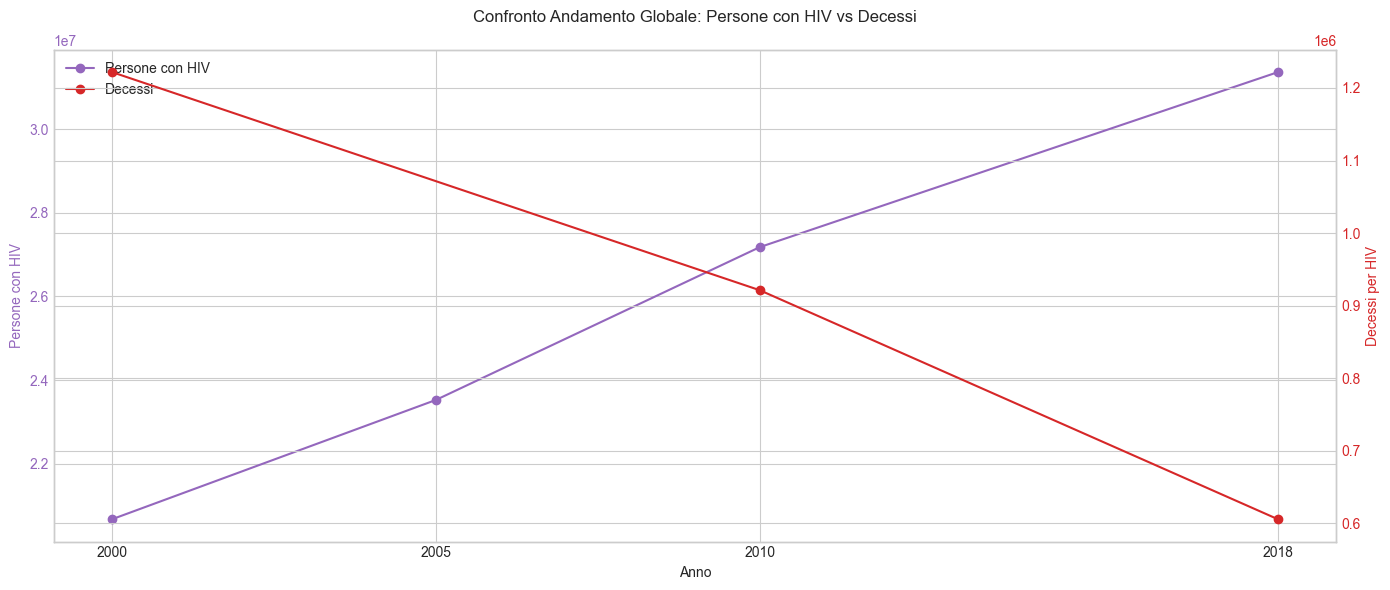

In [46]:
if not hiv_living.empty and not hiv_deaths.empty:
    plt.figure(figsize=(14, 6))
    
    # Calcolo trend
    living_trend = hiv_living.groupby('Year')['Count'].sum().reset_index()
    deaths_trend = hiv_deaths.groupby('Year')['Count'].sum().reset_index()
    
    # creiamo figura, doppio asse Y
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    color = 'tab:purple'
    ax1.set_xlabel('Anno')
    ax1.set_ylabel('Persone con HIV', color=color)
    ax1.plot(living_trend['Year'], living_trend['Count'], 'o-', color=color, label='Persone con HIV')
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Decessi per HIV', color=color)
    ax2.plot(deaths_trend['Year'], deaths_trend['Count'], 'o-', color=color, label='Decessi')
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('Confronto Andamento Globale: Persone con HIV vs Decessi', pad=20)
    plt.xticks(available_years)
    plt.grid(True)
    
    # Unica legenda per entrambi gli assi (y)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()


### 4.2 Mappe interattive arricchite (ultimo anno - 2018)

Mappe separate ma con evidenziata la distribuzione geografica dell'HIV. Ogni paese è colorato in base ai valori registrati, in modo da visualizzare quali regioni hanno i numeri più alti.

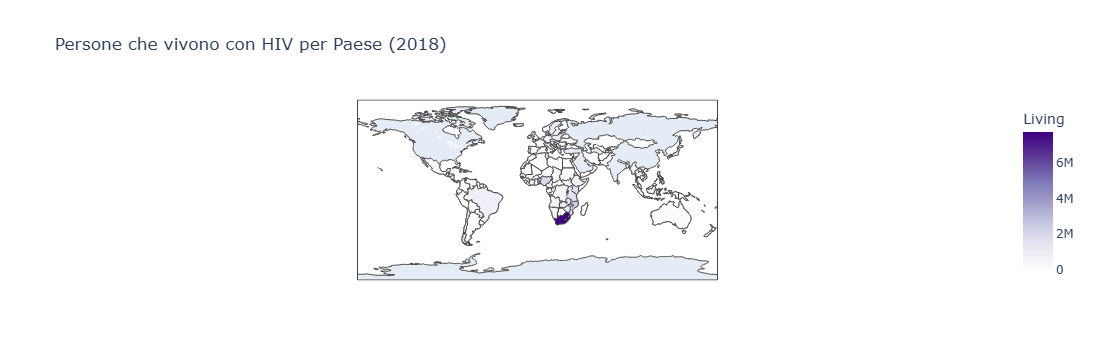

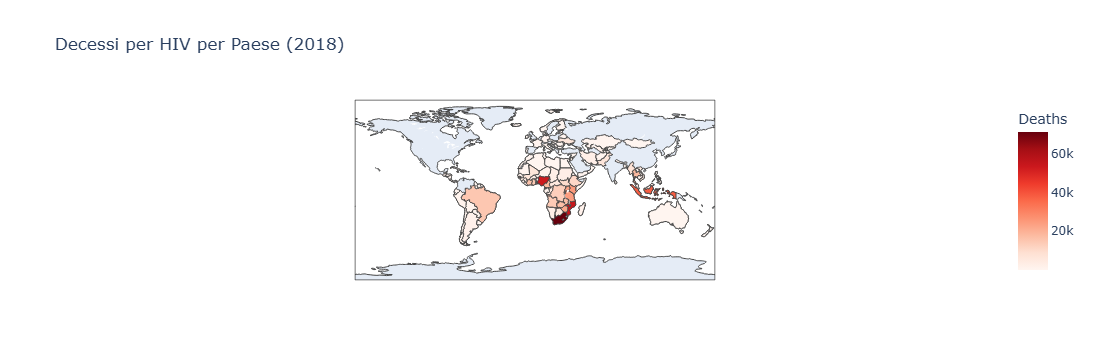

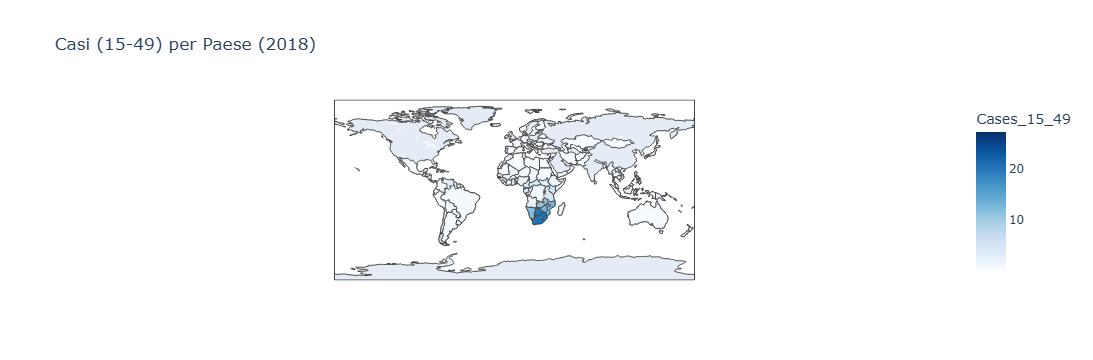

In [49]:

# Uniamo i dati dell'anno scorso per paese per mostrare più metriche al passaggio del mouse
merged_last = hiv_living_last[['Country','Count']].rename(columns={'Count':'Living'}).merge(
    hiv_deaths_last[['Country','Count']].rename(columns={'Count':'Deaths'}),
    on='Country', how='outer').merge(
    hiv_cases_last[['Country','Count']].rename(columns={'Count':'Cases_15_49'}),
    on='Country', how='outer')

# Calcolo rapporto deaths/living per passaggio mouse
merged_last['Death_Ratio'] = merged_last['Deaths'] / merged_last['Living'] * 100

# Mappa: Persone con HIV
fig_living = px.choropleth(merged_last.dropna(subset=['Living']),
                           locations='Country', locationmode='country names',
                           color='Living', hover_name='Country',
                           hover_data=['Cases_15_49','Deaths','Death_Ratio'],
                           color_continuous_scale=px.colors.sequential.Purples,
                           title=f'Persone che vivono con HIV per Paese ({last_year})', scope='world')
fig_living.show()

# Mappa: Decessi
fig_deaths = px.choropleth(merged_last.dropna(subset=['Deaths']),
                           locations='Country', locationmode='country names',
                           color='Deaths', hover_name='Country',
                           hover_data=['Living','Cases_15_49','Death_Ratio'],
                           color_continuous_scale=px.colors.sequential.Reds,
                           title=f'Decessi per HIV per Paese ({last_year})', scope='world')
fig_deaths.show()

# Mappa: Casi 15-49
fig_cases = px.choropleth(merged_last.dropna(subset=['Cases_15_49']),
                          locations='Country', locationmode='country names',
                          color='Cases_15_49', hover_name='Country',
                          hover_data=['Living','Deaths','Death_Ratio'],
                          color_continuous_scale=px.colors.sequential.Blues,
                          title=f'Casi (15-49) per Paese ({last_year})', scope='world')
fig_cases.show()


## 5) Top 15 e confronti

Classifica dei 15 paesi con più persone che vivono con l'HIV

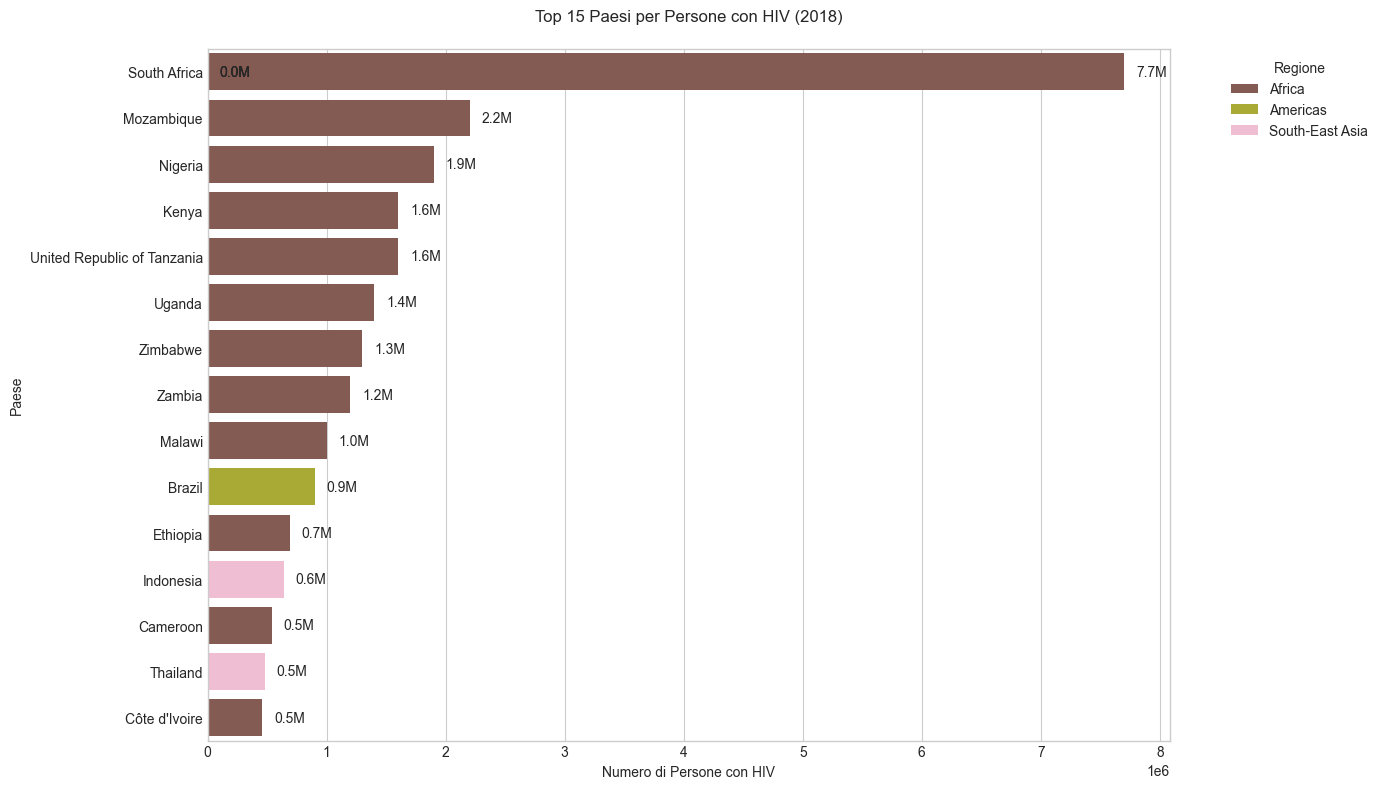

In [51]:
if not hiv_living_last.empty:
    # Selezioniamo le prime 15 righe con il valore più alto nella colonna 'Count', ignorando i NaN
    top_living = hiv_living_last.dropna(subset=['Count']).nlargest(15, 'Count')
    
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(data=top_living,
                    y='Country',
                    x='Count',
                    hue='WHO Region',
                    palette=colors_region,
                    dodge=False)
    
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 100000, p.get_y() + p.get_height()/2, 
                f"{width/1e6:.1f}M", va='center', fontsize=10)
    
    plt.title(f'Top 15 Paesi per Persone con HIV ({last_year})', pad=20)
    plt.xlabel('Numero di Persone con HIV')
    plt.ylabel('Paese')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Regione')
    plt.tight_layout()
    plt.show()



### 5.2 Confronto dei continenti
Confronto dei continenti/regioni geografiche, persone che vivono con l'HIV

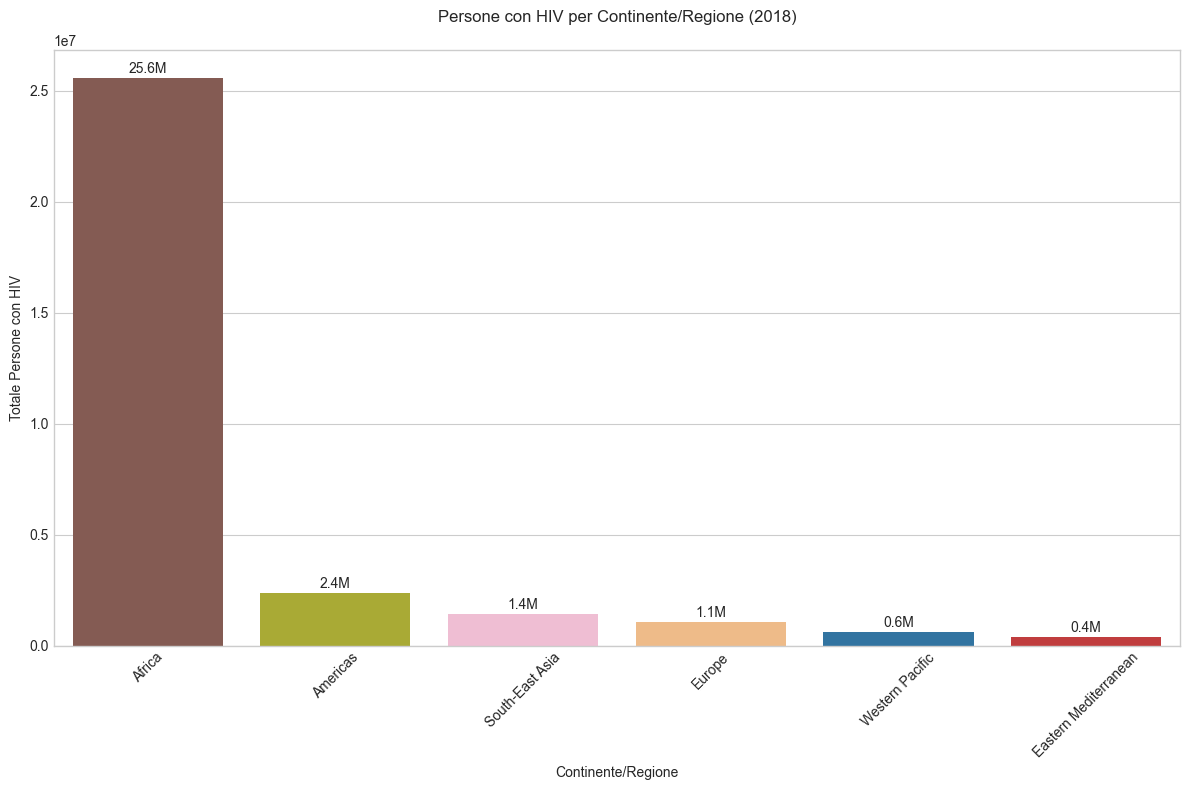

In [54]:
if not hiv_living_last.empty:
    # Raggruppiamo i dati per Regione e calcoliamo somma, media e mediana dei valori Count
    # Poi ordiniamo le regioni in base alla somma decrescente
    region_living = hiv_living_last.groupby('WHO Region')['Count'].agg(['sum', 'mean', 'median'])\
                                  .sort_values('sum', ascending=False)
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=region_living.reset_index(),
                    x='WHO Region',
                    y='sum',
                    hue='WHO Region',
                    palette=colors_region,
                    legend=False)
    
    plt.title(f'Persone con HIV per Continente/Regione ({last_year})', pad=20)
    plt.ylabel('Totale Persone con HIV')
    plt.xlabel('Continente/Regione')
    plt.xticks(rotation=45)
    
    for i, value in enumerate(region_living['sum']):
        plt.text(i, value + 1e5, f"{value/1e6:.1f}M", ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

## 6) Top 15 e confronti

Confronto del numero totale di decessi per paese

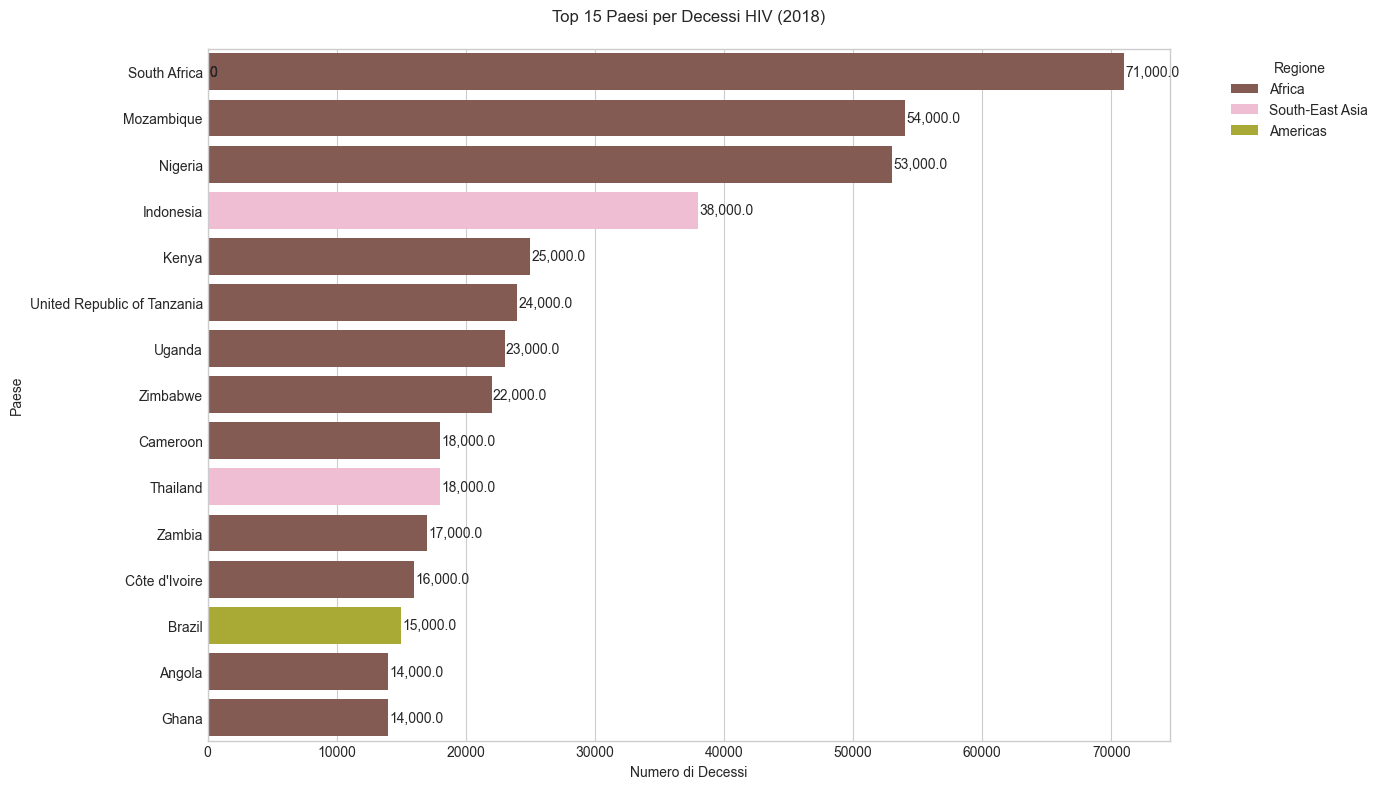

In [53]:
if not hiv_deaths_last.empty:
    # Selezioniamo le prime 15 righe con il valore più alto nella colonna 'Count', ignorando i NaN
    top_deaths = hiv_deaths_last.dropna(subset=['Count']).nlargest(15, 'Count')
    
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(data=top_deaths,
                    y='Country',
                    x='Count',
                    hue='WHO Region',
                    palette=colors_region,
                    dodge=False)
    
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 100, p.get_y() + p.get_height()/2, 
                f"{width:,}", va='center', fontsize=10)
    
    plt.title(f'Top 15 Paesi per Decessi HIV ({last_year})', pad=20)
    plt.xlabel('Numero di Decessi')
    plt.ylabel('Paese')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Regione')
    plt.tight_layout()
    plt.show()

### 6.2 Confronto dei continenti
Confronto dei continenti/regioni geografiche, decessi

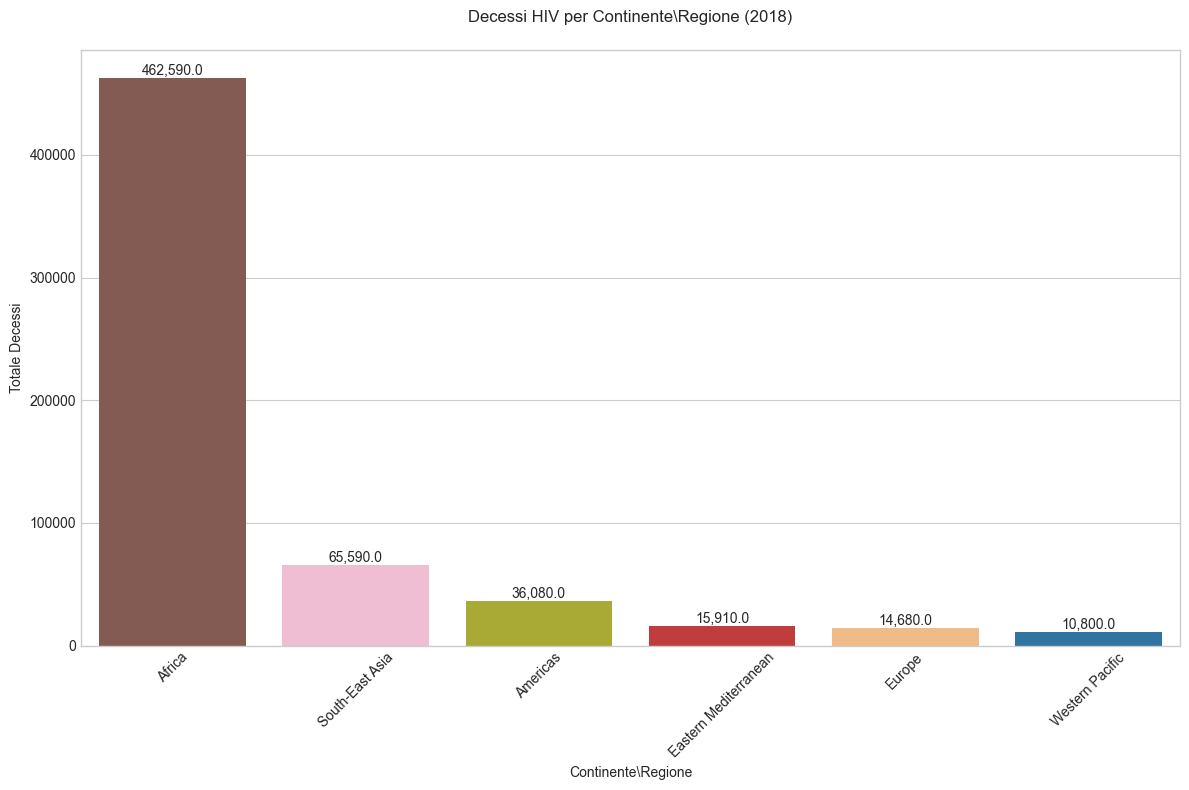

In [55]:
if not hiv_deaths_last.empty:
    # Raggruppiamo i dati per Regione OMS e calcoliamo somma, media e mediana dei valori Count
    # Poi ordiniamo le regioni in base alla somma decrescente
    region_deaths = hiv_deaths_last.groupby('WHO Region')['Count'].agg(['sum', 'mean', 'median'])\
                                  .sort_values('sum', ascending=False)
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=region_deaths.reset_index(),
                    x='WHO Region',
                    y='sum',
                    hue='WHO Region',
                    palette=colors_region,
                    legend=False)
    
    plt.title(f'Decessi HIV per Continente\Regione ({last_year})', pad=20)
    plt.ylabel('Totale Decessi')
    plt.xlabel('Continente\Regione')
    plt.xticks(rotation=45)
    
    for i, value in enumerate(region_deaths['sum']):
        plt.text(i, value + 100, f"{value:,}", ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


## 7) Analisi temporale per paesi selezionati
La matrice di correlazione mostra quanto sono legate tra loro le variabili (persone con HIV e decessi). Più il colore è vicino alla linea rossa, più la correlazione è forte.

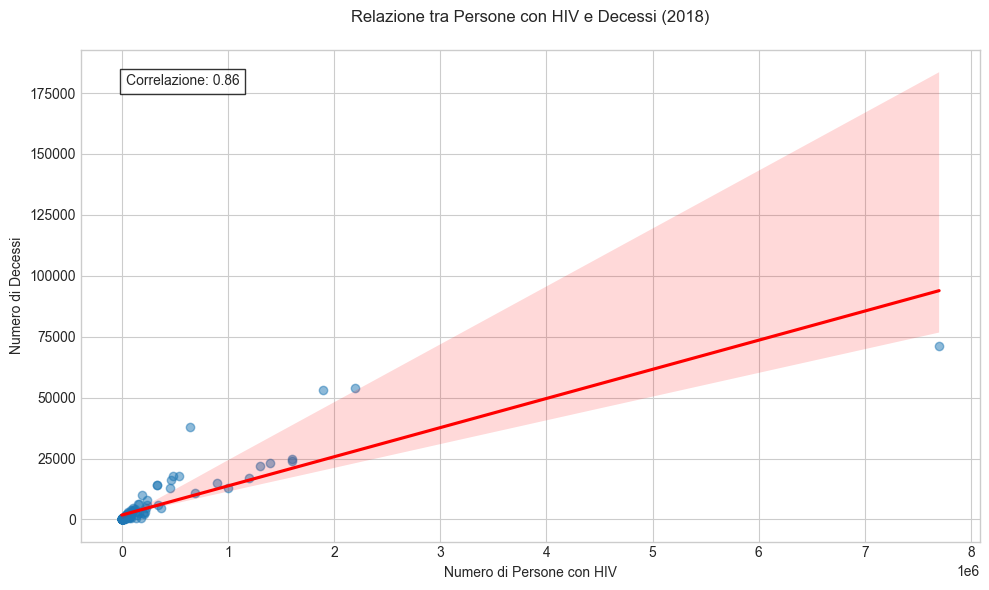

In [40]:
if not hiv_living_last.empty and not hiv_deaths_last.empty:
    # Unione dati per analisi correlazione
    correlation_data = pd.merge(
        hiv_living_last[['Country', 'Count']].rename(columns={'Count': 'Living'}),
        hiv_deaths_last[['Country', 'Count']].rename(columns={'Count': 'Deaths'}),
        on='Country', how='inner'
    ).dropna()
    
    if len(correlation_data) > 2:
        plt.figure(figsize=(10, 6))
        
        # Plot usando solo i valori numerici
        sns.regplot(data=correlation_data,
                    x='Living',
                    y='Deaths',
                    scatter_kws={'alpha':0.5},
                    line_kws={'color':'red'})
        
        # Calcolo correlazione escludendo colonne non numeriche
        corr = correlation_data[['Living', 'Deaths']].corr().iloc[0,1]
        
        plt.text(0.05, 0.95, f'Correlazione: {corr:.2f}', 
                 transform=plt.gca().transAxes, ha='left', va='top',
                 bbox=dict(facecolor='white', alpha=0.8))
        
        plt.title(f'Relazione tra Persone con HIV e Decessi ({last_year})', pad=20)
        plt.xlabel('Numero di Persone con HIV')
        plt.ylabel('Numero di Decessi')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Dati insufficienti per l'analisi di correlazione")
        


### Grafico 8
Il grafico mostra in dettaglio i trend storici per un gruppo di paesi selezionati (Afghanistan, Algeria, Angola, Argentina, Armenia). 

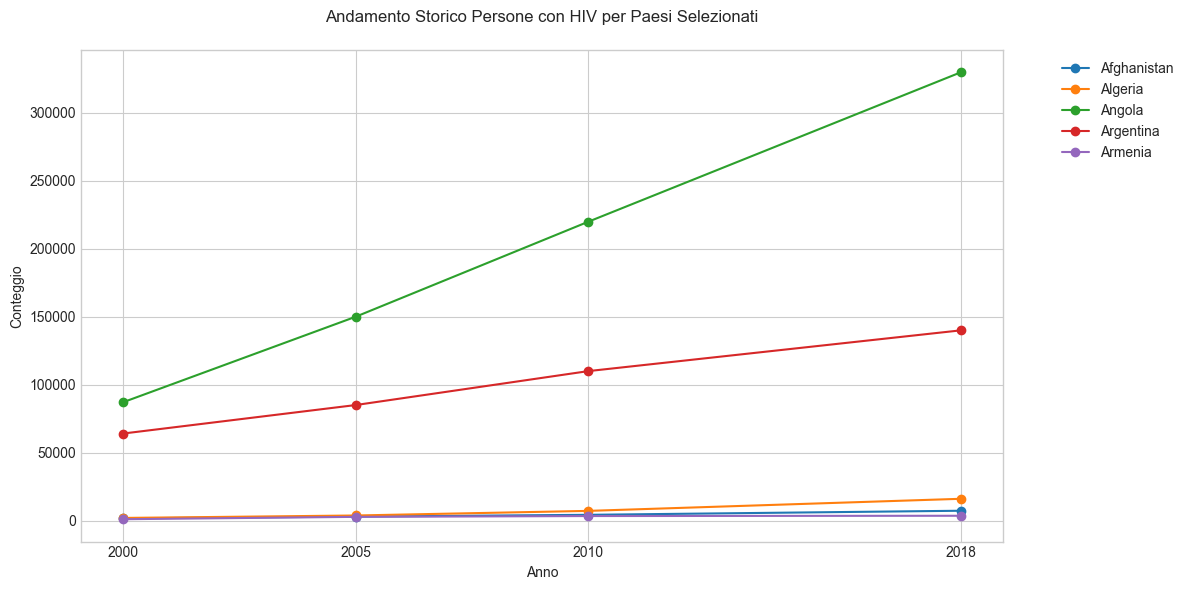

Nessun paese con dati completi per tutti gli anni - Andamento Storico Decessi HIV per Paesi Selezionati


In [56]:
def plot_temporal_analysis(df, title, color):
    """Funzione per tracciare l'analisi temporale"""
    if not df.empty:
        # Seleziona paesi con dati più completi
        countries_complete = df.groupby('Country')['Count'].count()
        selected_countries = countries_complete[countries_complete == len(available_years)].index[:5]
        
        if len(selected_countries) > 0:
            plt.figure(figsize=(12, 6))
            
            for country in selected_countries:
                country_data = df[df['Country'] == country]
                plt.plot(country_data['Year'], country_data['Count'], 'o-', label=country)
            
            plt.title(title, pad=20)
            plt.ylabel('Conteggio')
            plt.xlabel('Anno')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(True)
            plt.xticks(available_years)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Nessun paese con dati completi per tutti gli anni - {title}")

plot_temporal_analysis(hiv_living, 'Andamento Storico Persone con HIV per Paesi Selezionati', 'purple')
plot_temporal_analysis(hiv_deaths, 'Andamento Storico Decessi HIV per Paesi Selezionati', 'red')

# Conclusioni
Dall'analisi emergono alcuni punti chiave:

- L'Africa è il continente con più malati e decessi a causa dell'HIV.
- Il numero di persone che vivono con l'HIV rimane alto, ma mostra segni di stabilizzazione.
- I decessi hanno una tendenza al calo, grazie a migliori trattamenti e metodi di prevenzione.
- I casi nella fascia 15–49 anni sono molti, indicando che la prevenzione è cruciale in questa fascia di età.

Questi risultati sottolineano l'importanza di mantenere alta l'attenzione sulla prevenzione e sulle cure.

# GRAZIE PER L'ATTENZIONE